### Steps to Perform:

### command:
Starting cqlsh

Configuring cqlsh from a file

CAPTURE

CLEAR

CONSISTENCY

COPY

DESCRIBE

cqlshExpand

EXIT

LOGIN

PAGING

SERIAL CONSISTENCY

SHOW

SOURCE

TRACING

CQL commands

ALTER KEYSPACE

ALTER MATERIALIZED VIEW

ALTER ROLE

ALTER TABLE

ALTER TYPE

ALTER USER

BATCH

CREATE AGGREGATE

CREATE INDEX

CREATE FUNCTION

CREATE KEYSPACE

CREATE MATERIALIZED VIEW

CREATE TABLE

CREATE TRIGGER

CREATE TYPE

CREATE ROLE

CREATE USER (Deprecated)

DELETE

DROP AGGREGATE

DROP FUNCTION

DROP INDEX

DROP KEYSPACE

DROP MATERIALIZED VIEW

DROP ROLE

DROP TABLE

DROP TRIGGER

DROP TYPE

DROP USER (Deprecated)

GRANT

INSERT

LIST PERMISSIONS

LIST ROLES

LIST USERS (Deprecated)

REVOKE

SELECT

TRUNCATE

UPDATE

USE

#### Cassandra does not support
###### There are following limitations in Cassandra query language (CQL).

1. CQL does not support aggregation queries like max, min, avg
2. CQL does not support group by, having queries.
3. CQL does not support joins.
4. CQL does not support OR queries.
5. CQL does not support wildcard queries.
6. CQL does not support Union, Intersection queries.
7. Table columns cannot be filtered without creating the index.
8. Greater than (>) and less than (<) query is only supported on clustering column.
9. Cassandra query language is not suitable for analytics purposes because it has so many limitations.

### Install the DataStax Python driver:


In [1]:

!pip install cassandra-driver

### Connection with database:

In [47]:
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider

cloud_config={
        'secure_connect_bundle': 'C:/Users/Pawan/Desktop/msn_folder/jupyter/secure-connect-cassandra-db.zip'
        }
auth_provider = PlainTextAuthProvider('uPmjZMqmzAgzcXycZXpRgitC','ELsNJ3I91Cx7Xd-OGe,C9I1QZcsaEgxWLWHNgANDofdS,ZXSmwmumKrucNcOZuSOGZuW8,,EY1MKrKrck3wL8wNIX6jrj6czO+FAc.mqqc_94c-4xZFLnoWZFccRTmIS')
cluster = Cluster(cloud=cloud_config, auth_provider=auth_provider)
session = cluster.connect()
row = session.execute("select release_version from system.local").one()
if row:
    print(row[0])
else:
    print("An error occurred.")

4.0.0.6816


### Checking version:

In [4]:
import cassandra; 
print (cassandra.__version__)

3.25.0


### Creating keyspace

In [92]:
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider

cloud_config={
        'secure_connect_bundle': 'C:/Users/Pawan/Desktop/msn_folder/jupyter/secure-connect-cassandra-db.zip'
        }
auth_provider = PlainTextAuthProvider('uPmjZMqmzAgzcXycZXpRgitC','ELsNJ3I91Cx7Xd-OGe,C9I1QZcsaEgxWLWHNgANDofdS,ZXSmwmumKrucNcOZuSOGZuW8,,EY1MKrKrck3wL8wNIX6jrj6czO+FAc.mqqc_94c-4xZFLnoWZFccRTmIS')
cluster = Cluster(cloud=cloud_config, auth_provider=auth_provider)
session = cluster.connect()

row = session.execute("create keyspace shop WITH replication={'class':'SimpleStrategy','replication_factor':3}").one()

Unauthorized: Error from server: code=2100 [Unauthorized] message="Missing correct permission on shop."

### Describing keyspace:database

In [95]:
session = cluster.connect()
#row = session.execute("DESCRIBE keyspaces").one()
print("system_auth    shop    data_endpoint_auth  datastax_sla  system_virtual_schema \n system_schema  system  system_traces       ineuron       system_views") 

system_auth    shop    data_endpoint_auth  datastax_sla  system_virtual_schema 
 system_schema  system  system_traces       ineuron       system_views


##### note : if not give output try with CQL Console (describe < name_of_keyspace >)

### Creating table:

In [203]:
row=session.execute("use shop")
print("Query Execution:OK")

Query Execution:OK


In [202]:
session=cluster.connect()
row=session.execute("create table shop.tag(GI_id int , GI_product text,price float,quantity text, GI_location text,primary key(GI_id,gi_location))")
print("Query Execution:OK")

Query Execution:OK


### Describe table:

In [ ]:
row=session.execute("describe tag").one() 
print("Query Execution:OK")

##### note: Query is working fine with CQL Console (describe < name_of_table>)

### Inserting Values into tables:

In [204]:
row=session.execute("use shop").one() 
row=session.execute("insert into tag(GI_id,GI_product,price,quantity, GI_location)Values(001,'alphonso Mango',250.0,'1 kg','Ratnagiri')")
row=session.execute("insert into tag(GI_id,GI_product,price,quantity, GI_location)Values(002,'Kursani',1500.0,'1 kg','Sikkim')")
row=session.execute("insert into tag(GI_id,GI_product,price,quantity, GI_location)Values(003,'Kalamkari Painting',5000.0,'1 ','Andra pradesh')")
row=session.execute("insert into tag(GI_id,GI_product,price,quantity, GI_location)Values(004,'Patachitra Painting',5000.0,'1 ','Odisha')")
row=session.execute("insert into tag(GI_id,GI_product,price,quantity, GI_location)Values(005,'kashmir saffron',200.0,'1 gram','Kashmir')")
row=session.execute("insert into tag(GI_id,GI_product,price,quantity, GI_location)Values(006,'Rasagola',350.0,'1 kg','Odisha')")
row=session.execute("insert into tag(GI_id,GI_product,price,quantity, GI_location)Values(006,'Kandagi saree',650.0,'1 piece','thenni')")
row=session.execute("insert into tag(GI_id,GI_product,price,quantity, GI_location)Values(008,' kaji nemu',20.0,'1 kg','Assam')")
row=session.execute("insert into tag(GI_id,GI_product,price,quantity, GI_location)Values(009,' Dargeeling Tea',500.0,'250 gram','Assam')")
print("Query Execution:OK")

Query Execution:OK


### Select * command

1. The consistency level ONE means it needs acknowledgment from only one replica node. Since only one replica needs to acknowledge, the write operation is fastest in this case.

2. The consistency level QUORUM means it needs acknowledgment from 51% or a majority of replica nodes across all datacenters.

3. The consistency level of LOCAL_QUORUM means it needs acknowledgment from 51% or a majority of replica nodes just within the same datacenter as the coordinator. Thus, it avoids the latency of inter-datacenter communication.

4. The consistency level of ALL means it needs acknowledgment from all the replica nodes. Since all replica nodes need to acknowledge, the write operation is the slowest in this case. Moreover, if one of the replica nodes is down during the write operation, it fails, and availability suffers. Therefore, the best practice is not to use this option in production deployment.

In [205]:
row=session.execute("select * from shop.tag").all() 
print("Query Execution:OK")

Query Execution:OK


In [206]:
for r in row:
    print(r)

Row(gi_id=5, gi_location='Kashmir', gi_product='kashmir saffron', price=200.0, quantity='1 gram')
Row(gi_id=1, gi_location='Ratnagiri', gi_product='alphonso Mango', price=250.0, quantity='1 kg')
Row(gi_id=8, gi_location='Assam', gi_product=' kaji nemu', price=20.0, quantity='1 kg')
Row(gi_id=2, gi_location='Sikkim', gi_product='Kursani', price=1500.0, quantity='1 kg')
Row(gi_id=4, gi_location='Odisha', gi_product='Patachitra Painting', price=5000.0, quantity='1 ')
Row(gi_id=6, gi_location='Odisha', gi_product='Rasagola', price=350.0, quantity='1 kg')
Row(gi_id=6, gi_location='thenni', gi_product='Kandagi saree', price=650.0, quantity='1 piece')
Row(gi_id=9, gi_location='Assam', gi_product=' Dargeeling Tea', price=500.0, quantity='250 gram')
Row(gi_id=3, gi_location='Andra pradesh', gi_product='Kalamkari Painting', price=5000.0, quantity='1 ')


### Creating index :
##### syntax: create index (any index name) on table(table_column)

In [213]:
row=session.execute("create index product_index on shop.tag(gi_location);")
print(row)
print("Query Execution:OK")

Query Execution:OK


### Cassandra Drop Index:

##### Command ‘Drop index’ drops the specified index. If index name was not given during index creation, then index name is TableName_ColumnName_idx.

1. If the index does not exist, it will return an error unless IF EXISTS is used that will return no-op.
2. During index creation, you have to specify keyspace name with the index name otherwise index will be dropped from the current keyspace.

Syntax :Drop index IF EXISTS KeyspaceName.IndexName

In [136]:
row=session.execute("drop index if exists shop.product_index ;")
print(row)
print("Query Execution:OK")

Query Execution:OK


##### note : no need remove the index as it will enhance the search and filter process

### Where:

#### Applied conditions:
1. where condition is applicable only on indexs whether it primay or through filtering.

2. otherwise always give error: 
InvalidRequest: Error from server: code=2200 [Invalid query] message="Cannot execute this query as it might involve data filtering and thus may have unpredictable performance. If you want to execute this query despite the performance unpredictability, use ALLOW FILTERING"

3. create index command required

In [102]:
row=session.execute("select * from shop.tag where gi_id=3").one() 
print(row)
print("Query Execution:OK")

Row(gi_id=3, gi_location='Andra pradesh', gi_product='Kalamkari Painting', price=5000.0, quantity='1 ')
Query Execution:OK


In [142]:
row=session.execute("select * from shop.tag where gi_location='Assam';").one() 
print(row)
print("Query Execution:OK")

Row(gi_id=8, gi_location='Assam', gi_product=' kaji nemu', price=20.0, quantity='1 kg')
Query Execution:OK


### Alter table:

#### Command ‘Alter Table’ is used to drop column, add a new column, alter column name, alter column type and change the property of the table.

Syntax: Following is the syntax of command ‘Alter Table.’

In [116]:
row=session.execute("Alter table tag add date date").one() 
print(row)
print("Query Execution:OK")

None
Query Execution:OK


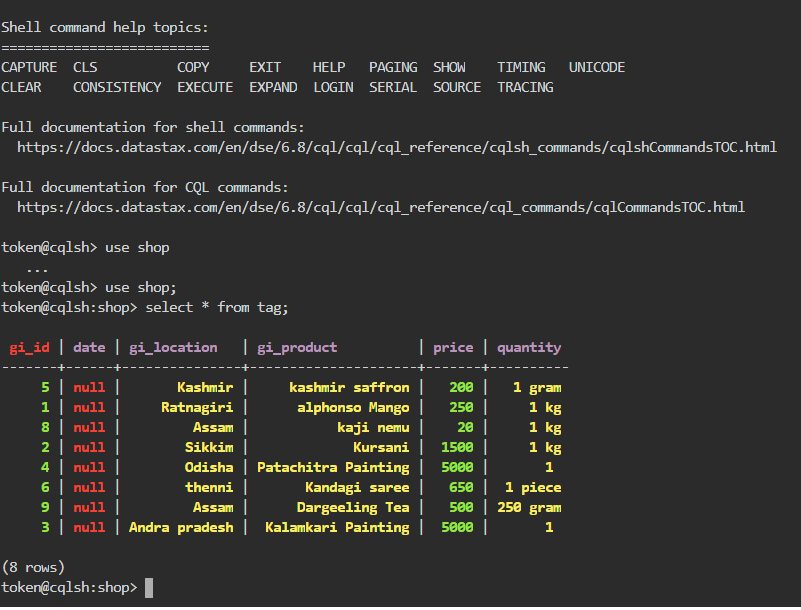

### Drop Table
###### Command ‘Drop table’ drops specified table including all the data from the keyspace. Before dropping the table, Cassandra takes a snapshot of the data not the schema as a backup.

Syntax :Drop Table KeyspaceName.TableName

In [160]:
row=session.execute("drop table shop.tag")
print(row)
print("Query Execution:OK")

Query Execution:OK


### Truncate Table
##### Command ‘Truncate table’ removes all the data from the specified table. Before truncating the data, Cassandra takes the snapshot of the data as a backup.

Syntax:Truncate KeyspaceName.TableName

In [131]:
row=session.execute("truncate table shop.tag")
print(row)
print("Query Execution:OK")

Query Execution:OK


### Upsert Data
#### Cassandra does upsert. 
1. Upsert means that Cassandra will insert a row if a primary key does not exist already otherwise if primary key already exists,it will update that row.

### Update Data
###### The Cassandra Update query is used to update the data in the Cassandra table. If no results are returned after updating data, it means data is successfully updated otherwise an error will be returned. Column values are changed in ‘Set’ clause while data is filtered with ‘Where’ clause.

In [135]:
row= session.execute("use shop") 
row=session.execute("Update tag Set price=21 Where gi_id=8")  ## executing on primary conditions
print(row)
print("Query Execution:OK")

Query Execution:OK


In [144]:
row=session.execute("select * from shop.tag where gi_product='Dargeeling tea' and gi_location='Assam' ").one() 
print(row)
print("Query Execution:OK")

None
Query Execution:OK


### try not to use Distinct and order as also cassandra does not support

row=session.execute("select * from tag where gi_location='Assam' and price < 500  order BY price desc allow filtering")

print(row)


### AS: [createview]

In [208]:
row=session.execute("use shop")   
row=session.execute(" SELECT gi_location,gi_product as whole_list from tag;") 
print(row)
print("Query Execution:OK")

Query Execution:OK


### delete a row :

In [216]:
row=session.execute("use shop")   
row=session.execute(" delete from tag where gi_id=8;") # use primay key
print(row)
print("Query Execution:OK")

Query Execution:OK
